# Introduction

In Lab 2, we are going to utilize several methods of hyphothesis testing on the dataset **wine** from UCI including one population mean z-test,  two population means t-test and so on. 

**Statsmodels** and **Scipy** are needed.

In [6]:
#import library to be used
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
import warnings
warnings.filterwarnings('ignore') 


In [ ]:
#install statsmodels by pip if it is not installed
!pip install statsmodels

In [ ]:
#install scipy by pip if it is not installed
!pip install scipy

In [7]:
#load the dataset 
dataset = sklearn.datasets.load_wine()
#show the document of the dataset
print(dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#show the document of the dataset
print(dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

From the descr of the dataset *wine*, we know that this dataset is about wine.

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

In [3]:
# show the list of keys of the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [6]:
# show the names of targets in the dataset
dataset['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
# form the object with dataframe as type
data = pd.DataFrame(dataset['data'],columns = dataset['feature_names'])
data['target'] = dataset['target']
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
#show the info of the dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [24]:
# check if there exists any missing value 
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

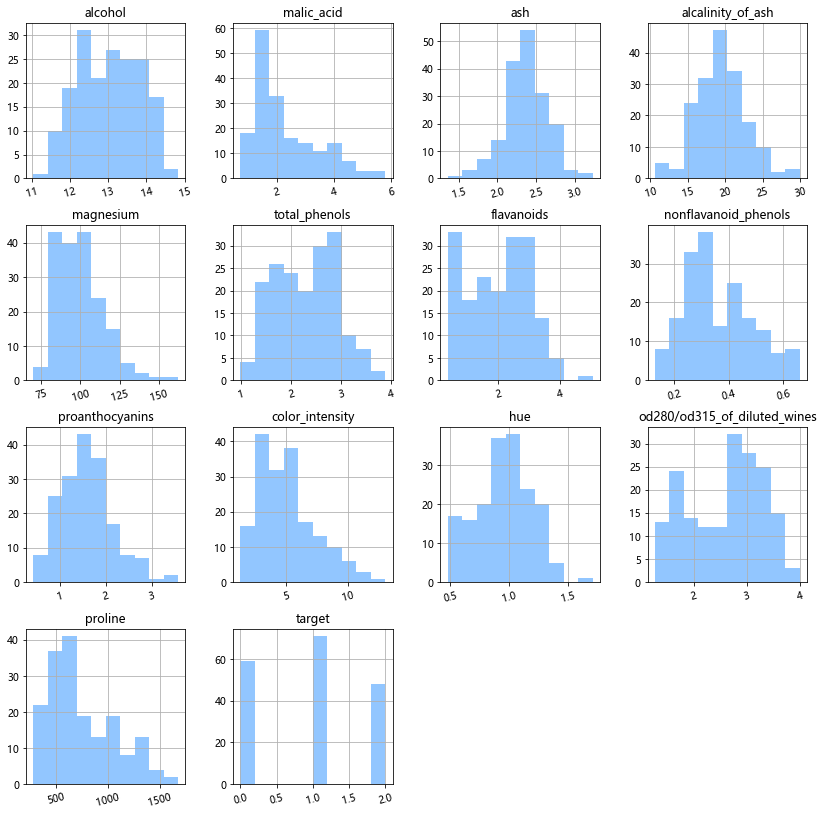

In [81]:
data.hist(bins=10, figsize=(14,14),xrot=15)
plt.show()

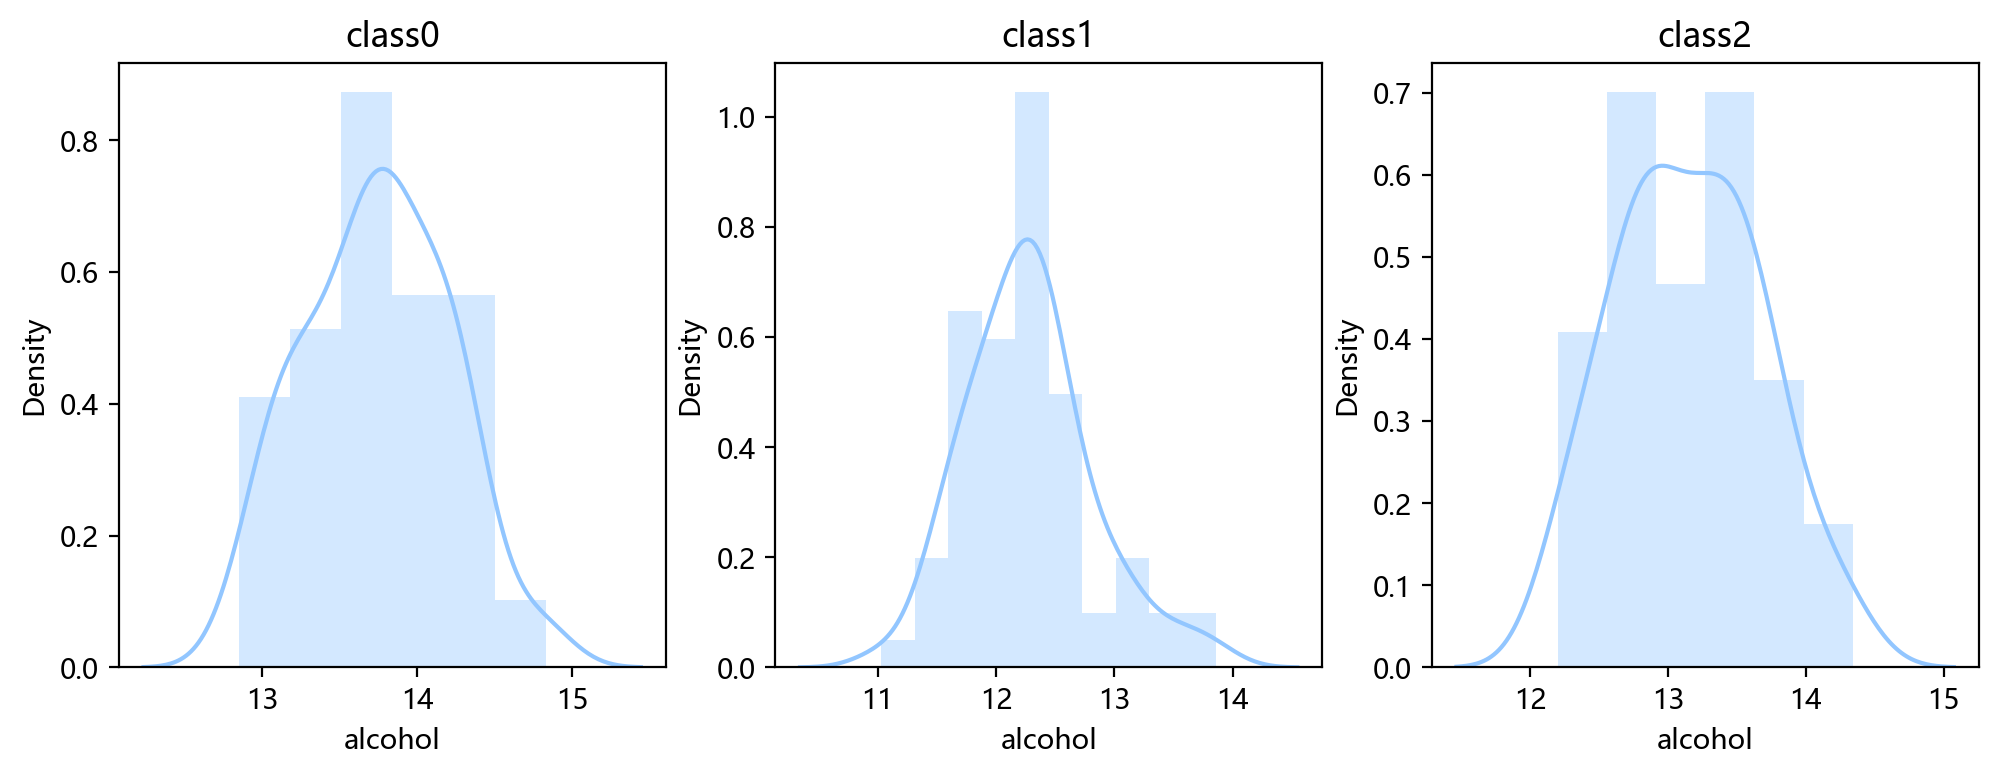

In [9]:
# shows the alcohol content grouped by 'class'
plt.figure(figsize = (12,4),dpi=200)
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.distplot(data[data['target']==i]['alcohol'],kde = True)
    plt.title('class'+str(i))
plt.show()

In [11]:
# choose cases with 'target' as 1
data_1 = data[data['target'] == 1]

## One population mean z-test

In [12]:
print(data_1['alcohol'].mean())

12.278732394366198


In [13]:
print(data_1['alcohol'].mean())
'''
H_0: the average alcohol content of class_1-wine is 12 
H_a: the average alcohol content of class_1-wine is not equal to 12
'''
import statsmodels.stats.weightstats

z,pval = statsmodels.stats.weightstats.ztest(data_1['alcohol'],value = 12,alternative='two-sided')
print(z,pval)

'''
p = 1.2666192509733668e-05 < .05, reject H_0
'''

12.278732394366198
4.3657938005865145 1.266619250973367e-05


'\np = 1.2666192509733668e-05 < .05, reject H_0\n'

In [ ]:
help(statsmodels.stats.weightstats.ztest)

## One population mean t-test

In [14]:
import scipy.stats
t,pval = scipy.stats.ttest_1samp(data_1['alcohol'],popmean=12)
print(t,pval)
'''
p = 4.287629382972247e-05 < .05, reject H_0 
'''

4.3657938005865145 4.287629382972247e-05


'\np = 4.287629382972247e-05 < .05, reject H_0 \n'

In [ ]:
help(scipy.stats.ttest_1samp)

## Two population means t-test

In [15]:
data_2 = data[data['target'] == 2]
print(data_1['alcohol'].mean())
print(data_2['alcohol'].mean())

12.278732394366198
13.153749999999997


In [16]:
'''
H_0: the alcohol content of class_1-wine is equal to that of class_2-wine
H_a: the alcohol content of class_1-wine differs from that of class_2-wine
'''
import scipy.stats
t,pval = scipy.stats.ttest_ind(data_1['alcohol'],data_2['alcohol'],alternative = 'two-sided')
print(t,pval)
'''
p < 0.05, reject H_0, it is considered that the alcohol content is different between the two 
'''


-8.75468634298109 1.8274340185929396e-14


'\np < 0.05, reject H_0, it is considered that the alcohol content is different between the two \n'

## Mann-Whitney rank test


In [12]:
scipy.stats.mannwhitneyu(data_1['alcohol'],data_2['alcohol'],alternative='two-sided')

MannwhitneyuResult(statistic=410.0, pvalue=2.4196781051850865e-12)

## Sign test

In [23]:
def sign_test(data,median):
    k=min(len(data[data>median]), len(data[data<median]))
    pval=2*scipy.stats.binom.cdf(k, len(data), 0.5)
    return pval

print(sign_test(data_1['alcohol'],12))


0.000112268646894988
